# Load the Libraries

In [423]:
#!pip install pandas numpy seaborn matplotlib scikit-learn statsmodels
#!pip install seaborn==0.13
#!pip install matplotlib==3.7.3

In [424]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Loading the Dataset

In [425]:
bikeSharing = pd.read_csv("C:/Users/grkk/Downloads/day.csv")
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Understanding the size and structure of the data

In [426]:
bikeSharing.shape

(730, 16)

## Identifying the Null Values

In [427]:
bikeSharing.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Understanding the datatype of data set

In [428]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Analysing and Dropping the unneccessary columns

In [429]:
columndatatype = [] 
for col in bikeSharing.columns:
    unique_values =bikeSharing[col].unique()
    data_type =bikeSharing[col].dtype
    columndatatype.append ([col, unique_values, data_type])
columndatatype_df =pd.DataFrame(columndatatype, columns = ['col','unique_values','data_type'])
columndatatype_df

,col,unique_values,data_type
0,instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64
1,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...",object
2,season,"[1, 2, 3, 4]",int64
3,yr,"[0, 1]",int64
4,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",int64
5,holiday,"[0, 1]",int64
6,weekday,"[6, 0, 1, 2, 3, 4, 5]",int64
7,workingday,"[0, 1]",int64
8,weathersit,"[2, 1, 3]",int64
9,temp,"[14.110847, 14.902598, 8.050924, 8.2, 9.305237...",float64


#### 1. Columns "casual" and "registered" will be dropped as the data represents the number of casual users and Registered users .To know the demand against varied factors we will utilize the "cnt" column

In [430]:
bikeSharing_cleaned =bikeSharing.drop(columns ='casual')
bikeSharing_cleaned.shape

(730, 15)

In [431]:
bikeSharing_cleaned =bikeSharing_cleaned.drop(columns ='registered')
bikeSharing_cleaned.shape

(730, 14)

In [432]:
bikeSharing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 80.0+ KB


#### 2. Rounding off the float values to 2 decimal for columns - temp , atemp , hum and windspeed

In [433]:
bikeSharing_cleaned['temp'] = bikeSharing_cleaned['temp'].round(2)

In [434]:
bikeSharing_cleaned['atemp'] = bikeSharing_cleaned['atemp'].round(2)

In [435]:
bikeSharing_cleaned['hum'] = bikeSharing_cleaned['hum'].round(2)

In [436]:
bikeSharing_cleaned['windspeed'] = bikeSharing_cleaned['windspeed'].round(2)

In [437]:
columndatatype = [] 
for col in bikeSharing_cleaned.columns:
    unique_values =bikeSharing_cleaned[col].unique()
    data_type =bikeSharing_cleaned[col].dtype
    columndatatype.append ([col, unique_values, data_type])
columndatatype_df =pd.DataFrame(columndatatype, columns = ['col','unique_values','data_type'])
columndatatype_df

,col,unique_values,data_type
0,instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64
1,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...",object
2,season,"[1, 2, 3, 4]",int64
3,yr,"[0, 1]",int64
4,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",int64
5,holiday,"[0, 1]",int64
6,weekday,"[6, 0, 1, 2, 3, 4, 5]",int64
7,workingday,"[0, 1]",int64
8,weathersit,"[2, 1, 3]",int64
9,temp,"[14.11, 14.9, 8.05, 8.2, 9.31, 8.38, 8.06, 6.7...",float64


#### 3. Understanding the unique values of "season" column and converting it to categorical string datatype as represented in data dictionary 
1:spring, 2:summer, 3:fall, 4:winter

In [438]:
bikeSharing_cleaned['season'].unique()

array([1, 2, 3, 4], dtype=int64)

In [439]:
season_dictionary = {
    1 : 'spring',
    2 : 'summer',
    3 : 'fall' ,
    4 : 'winter'}

In [440]:
bikeSharing_cleaned['season'] = bikeSharing_cleaned['season'].map(season_dictionary)

In [441]:
### bikeSharing_cleaned['season'] =bikeSharing_cleaned['season'].astype('string')

In [442]:
bikeSharing_cleaned['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [443]:
bikeSharing_cleaned['season'].dtype

dtype('O')

In [444]:
columndatatype = [] 
for col in bikeSharing_cleaned.columns:
    unique_values =bikeSharing_cleaned[col].unique()
    data_type =bikeSharing_cleaned[col].dtype
    columndatatype.append ([col, unique_values, data_type])
columndatatype_df =pd.DataFrame(columndatatype, columns = ['col','unique_values','data_type'])
columndatatype_df

,col,unique_values,data_type
0,instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64
1,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...",object
2,season,"[spring, summer, fall, winter]",object
3,yr,"[0, 1]",int64
4,mnth,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]",int64
5,holiday,"[0, 1]",int64
6,weekday,"[6, 0, 1, 2, 3, 4, 5]",int64
7,workingday,"[0, 1]",int64
8,weathersit,"[2, 1, 3]",int64
9,temp,"[14.11, 14.9, 8.05, 8.2, 9.31, 8.38, 8.06, 6.7...",float64


#### 4. Understanding the unique values of "yr" column and converting it to categorical string datatype as represented in data dictionary 
0: 2018, 1:2019

In [445]:
bikeSharing_cleaned['yr'].unique()

array([0, 1], dtype=int64)

In [446]:
year_dictionary = {
    0 : 2018,
    1 : 2019,
   }

In [447]:
bikeSharing_cleaned['yr'] = bikeSharing_cleaned['yr'].map(year_dictionary)
bikeSharing_cleaned['yr'].unique()

array([2018, 2019], dtype=int64)

#### 5. Checking unique values of holiday , workingday , mnth and weekday column. Updating the values to categorical

In [448]:
bikeSharing_cleaned['holiday'].unique()

array([0, 1], dtype=int64)

In [449]:
holiday_dictionary = {
    0 : 'notaHoliday',
    1 : 'Holiday',
   }
bikeSharing_cleaned['holiday'] = bikeSharing_cleaned['holiday'].map(holiday_dictionary)
bikeSharing_cleaned['holiday'].unique()

array(['notaHoliday', 'Holiday'], dtype=object)

In [450]:
bikeSharing_cleaned['workingday'].unique()

array([0, 1], dtype=int64)

In [451]:
workingday_dictionary = {
    0 : 'notaworkday',
    1 : 'workday',
   }
bikeSharing_cleaned['workingday'] = bikeSharing_cleaned['workingday'].map(workingday_dictionary)
bikeSharing_cleaned['workingday'].unique()

array(['notaworkday', 'workday'], dtype=object)

In [452]:
bikeSharing_cleaned['mnth'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [453]:
month_dictionary = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May',
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug' ,
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
   }
bikeSharing_cleaned['mnth'] = bikeSharing_cleaned['mnth'].map(month_dictionary)
bikeSharing_cleaned['mnth'].unique()

array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [454]:
bikeSharing_cleaned['weekday'].unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [455]:
weekday_dictionary = {
    0 : 'Sun',
    1 : 'Mon',
    2 : 'Tue',
    3 : 'Wed',
    4 : 'Thu',
    5 : 'Fri',
    6 : 'Sat',   
   }
bikeSharing_cleaned['weekday'] = bikeSharing_cleaned['weekday'].map(weekday_dictionary)
bikeSharing_cleaned['weekday'].unique()

array(['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri'], dtype=object)

In [456]:
columndatatype = [] 
for col in bikeSharing_cleaned.columns:
    unique_values =bikeSharing_cleaned[col].unique()
    data_type =bikeSharing_cleaned[col].dtype
    columndatatype.append ([col, unique_values, data_type])
columndatatype_df =pd.DataFrame(columndatatype, columns = ['col','unique_values','data_type'])
columndatatype_df

,col,unique_values,data_type
0,instant,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64
1,dteday,"[01-01-2018, 02-01-2018, 03-01-2018, 04-01-201...",object
2,season,"[spring, summer, fall, winter]",object
3,yr,"[2018, 2019]",int64
4,mnth,"[Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, ...",object
5,holiday,"[notaHoliday, Holiday]",object
6,weekday,"[Sat, Sun, Mon, Tue, Wed, Thu, Fri]",object
7,workingday,"[notaworkday, workday]",object
8,weathersit,"[2, 1, 3]",int64
9,temp,"[14.11, 14.9, 8.05, 8.2, 9.31, 8.38, 8.06, 6.7...",float64


#### 6. Checking unique values of weathersit column. Updating the values to categorical

In [457]:
bikeSharing_cleaned['weathersit'].unique()

array([2, 1, 3], dtype=int64)

In [458]:
weathersit_dictionary = {
    1 : 'Clear',
    2 : 'Mist',
    3 : 'Light Snow or Rain',
    4 : 'Snow or Heavy Rain',  
   }
bikeSharing_cleaned['weathersit'] = bikeSharing_cleaned['weathersit'].map(weathersit_dictionary)
bikeSharing_cleaned['weathersit'].unique()

array(['Mist', 'Clear', 'Light Snow or Rain'], dtype=object)

#### 7. Dropping of the unnecessary columns in data set - instant and dteday

In [459]:
bikeSharing_cleaned

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,01-01-2018,spring,2018,Jan,notaHoliday,Sat,notaworkday,Mist,14.11,18.18,80.58,10.75,985
1,2,02-01-2018,spring,2018,Jan,notaHoliday,Sun,notaworkday,Mist,14.90,17.69,69.61,16.65,801
2,3,03-01-2018,spring,2018,Jan,notaHoliday,Mon,workday,Clear,8.05,9.47,43.73,16.64,1349
3,4,04-01-2018,spring,2018,Jan,notaHoliday,Tue,workday,Clear,8.20,10.61,59.04,10.74,1562
4,5,05-01-2018,spring,2018,Jan,notaHoliday,Wed,workday,Clear,9.31,11.46,43.70,12.52,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,spring,2019,Dec,notaHoliday,Thu,workday,Mist,10.42,11.33,65.29,23.46,2114
726,727,28-12-2019,spring,2019,Dec,notaHoliday,Fri,workday,Mist,10.39,12.75,59.00,10.42,3095
727,728,29-12-2019,spring,2019,Dec,notaHoliday,Sat,notaworkday,Mist,10.39,12.12,75.29,8.33,1341
728,729,30-12-2019,spring,2019,Dec,notaHoliday,Sun,notaworkday,Clear,10.49,11.58,48.33,23.50,1796


In [460]:
bikeSharing_cleaned =bikeSharing_cleaned.drop(columns ='instant')
bikeSharing_cleaned.shape

(730, 13)

In [461]:
bikeSharing_cleaned =bikeSharing_cleaned.drop(columns ='dteday')
bikeSharing_cleaned.shape

(730, 12)

In [462]:
columndatatype = [] 
for col in bikeSharing_cleaned.columns:
    unique_values =bikeSharing_cleaned[col].unique()
    data_type =bikeSharing_cleaned[col].dtype
    columndatatype.append ([col, unique_values, data_type])
columndatatype_df =pd.DataFrame(columndatatype, columns = ['col','unique_values','data_type'])
columndatatype_df

,col,unique_values,data_type
0,season,"[spring, summer, fall, winter]",object
1,yr,"[2018, 2019]",int64
2,mnth,"[Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, ...",object
3,holiday,"[notaHoliday, Holiday]",object
4,weekday,"[Sat, Sun, Mon, Tue, Wed, Thu, Fri]",object
5,workingday,"[notaworkday, workday]",object
6,weathersit,"[Mist, Clear, Light Snow or Rain]",object
7,temp,"[14.11, 14.9, 8.05, 8.2, 9.31, 8.38, 8.06, 6.7...",float64
8,atemp,"[18.18, 17.69, 9.47, 10.61, 11.46, 11.66, 10.4...",float64
9,hum,"[80.58, 69.61, 43.73, 59.04, 43.7, 51.83, 49.8...",float64


#### 8. Reanaming the columns for ease of use

In [463]:
bikeSharing_cleaned.rename(columns={'yr':'year','mnth':'month','atemp':'actualtemp','hum':'humidity','cnt':'count'},inplace=True)

In [464]:
bikeSharing_cleaned

,season,year,month,holiday,weekday,workingday,weathersit,temp,actualtemp,humidity,windspeed,count
0,spring,2018,Jan,notaHoliday,Sat,notaworkday,Mist,14.11,18.18,80.58,10.75,985
1,spring,2018,Jan,notaHoliday,Sun,notaworkday,Mist,14.90,17.69,69.61,16.65,801
2,spring,2018,Jan,notaHoliday,Mon,workday,Clear,8.05,9.47,43.73,16.64,1349
3,spring,2018,Jan,notaHoliday,Tue,workday,Clear,8.20,10.61,59.04,10.74,1562
4,spring,2018,Jan,notaHoliday,Wed,workday,Clear,9.31,11.46,43.70,12.52,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,notaHoliday,Thu,workday,Mist,10.42,11.33,65.29,23.46,2114
726,spring,2019,Dec,notaHoliday,Fri,workday,Mist,10.39,12.75,59.00,10.42,3095
727,spring,2019,Dec,notaHoliday,Sat,notaworkday,Mist,10.39,12.12,75.29,8.33,1341
728,spring,2019,Dec,notaHoliday,Sun,notaworkday,Clear,10.49,11.58,48.33,23.50,1796


In [465]:
bikeSharing_cleaned.isnull().sum()

season        0
year          0
month         0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
actualtemp    0
humidity      0
windspeed     0
count         0
dtype: int64

## Dataset post Analysis and Data cleaning

In [466]:
bikeSharing_cleaned.shape

(730, 12)

In [467]:
bikeSharing_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   actualtemp  730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 68.6+ KB


In [468]:
bikeSharing_cleaned

,season,year,month,holiday,weekday,workingday,weathersit,temp,actualtemp,humidity,windspeed,count
0,spring,2018,Jan,notaHoliday,Sat,notaworkday,Mist,14.11,18.18,80.58,10.75,985
1,spring,2018,Jan,notaHoliday,Sun,notaworkday,Mist,14.90,17.69,69.61,16.65,801
2,spring,2018,Jan,notaHoliday,Mon,workday,Clear,8.05,9.47,43.73,16.64,1349
3,spring,2018,Jan,notaHoliday,Tue,workday,Clear,8.20,10.61,59.04,10.74,1562
4,spring,2018,Jan,notaHoliday,Wed,workday,Clear,9.31,11.46,43.70,12.52,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,2019,Dec,notaHoliday,Thu,workday,Mist,10.42,11.33,65.29,23.46,2114
726,spring,2019,Dec,notaHoliday,Fri,workday,Mist,10.39,12.75,59.00,10.42,3095
727,spring,2019,Dec,notaHoliday,Sat,notaworkday,Mist,10.39,12.12,75.29,8.33,1341
728,spring,2019,Dec,notaHoliday,Sun,notaworkday,Clear,10.49,11.58,48.33,23.50,1796


# Writing cleaned data to new Data set 

In [469]:
bikeSharing_cleaned.to_csv("C:/Users/grkk/Downloads/bikeSharing_cleaned_Master.csv",encoding ='utf-8' ,index = False)

# Analysis of data

## 1.Univariate Analysis

## Univariate analysis of Bike sharing frequency distribution across range of counts 

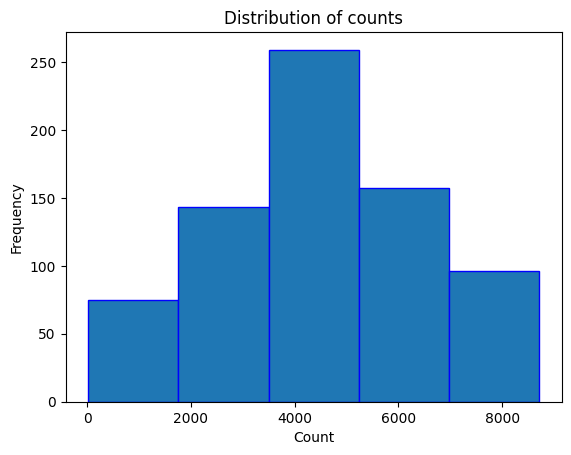

In [470]:
plt.hist(bikeSharing_cleaned['count'], bins=5, edgecolor='blue')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Distribution of counts')
plt.show()

#### Conclusion of above graph - a.Frequency of 4000 users using Bike sharing has been highest and it occurs 250 times
####                             b.Frequency of less than 2000 users using bike share has been lowest and it occurs less than 100 times

## Univariate analysis of Bike sharing frequency distribution across seasons

In [471]:
bikeSharing_cleaned['season'].value_counts()
bikeSharing_counts=bikeSharing_cleaned['season'].value_counts()
bikeSharing_counts

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

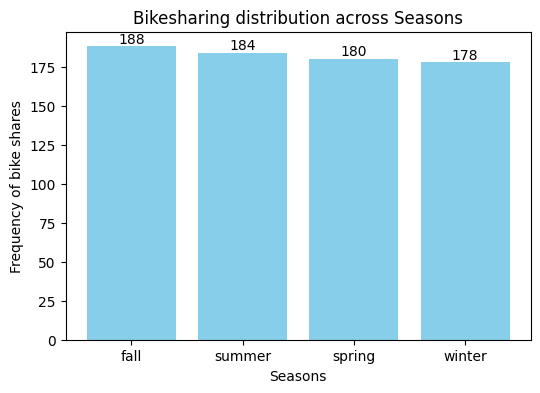

In [472]:
plt.figure(figsize=(6,4))
bars= plt.bar(bikeSharing_counts.index,bikeSharing_counts.values, color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Seasons')
plt.xlabel('Seasons')
plt.ylabel('Frequency of bike shares')
plt.show()

#### Conclusion of above graph - a.Frequency of Bike sharing is highest in Fall season around 188 times
####                             b.Frequency of Bike sharing of around 178 times is lowest and is recorded in winter seasons

## Univariate analysis to understand Bike sharing frequency distribution across Holiday vs non holiday

In [473]:
bikeSharing_cleaned['holiday'].value_counts()
bikeSharing_counts_holiday=bikeSharing_cleaned['holiday'].value_counts()
bikeSharing_counts_holiday

holiday
notaHoliday    709
Holiday         21
Name: count, dtype: int64

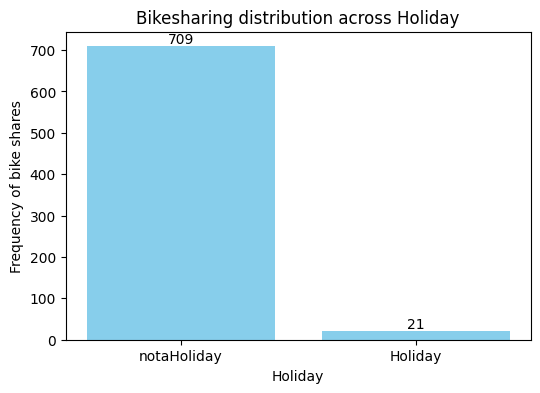

In [474]:
plt.figure(figsize=(6,4))
bars= plt.bar(bikeSharing_counts_holiday.index,bikeSharing_counts_holiday.values, color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('Holiday')
plt.ylabel('Frequency of bike shares')
plt.show()

#### Conclusion of above graph - a.Frequency of Bike sharing is highest in a Non Holiday day with 709 times

## Univariate analysis of Frequency distribution across Year

In [475]:
bikeSharing_cleaned['year'].value_counts()
bikeSharing_cleaned_Yearcounts = bikeSharing_cleaned['year'].value_counts()
bikeSharing_cleaned_Yearcounts

year
2018    365
2019    365
Name: count, dtype: int64

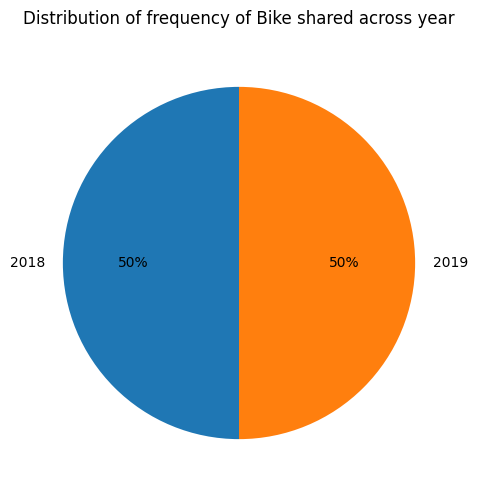

In [476]:
plt.figure(figsize=(5, 6))
plt.pie(bikeSharing_cleaned_Yearcounts, labels=bikeSharing_cleaned_Yearcounts.index, autopct='%.0f%%', startangle=90)
plt.title('Distribution of frequency of Bike shared across year')
plt.axis('equal')
plt.show()

#### Conclusion of above graph - a.Frequency of Bike sharing is equal across year 2018 and 2019 years

## Univariate analysis of Frequency distribution across Weathersit

In [477]:
bikeSharing_cleaned['weathersit'].value_counts()
bikeSharing_cleaned_weathersitcounts = bikeSharing_cleaned['weathersit'].value_counts()
bikeSharing_cleaned_weathersitcounts

weathersit
Clear                 463
Mist                  246
Light Snow or Rain     21
Name: count, dtype: int64

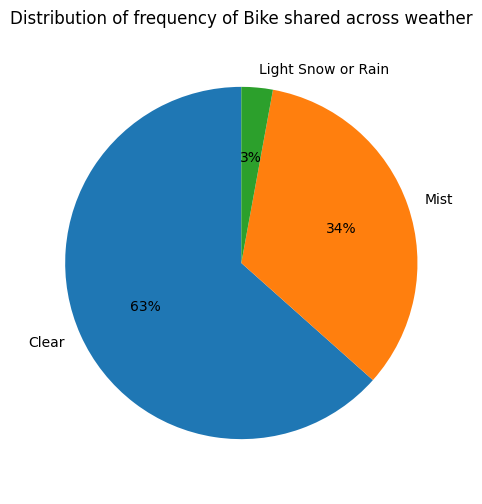

In [478]:
plt.figure(figsize=(5, 6))
plt.pie(bikeSharing_cleaned_weathersitcounts, labels=bikeSharing_cleaned_weathersitcounts.index, autopct='%.0f%%', startangle=90)
plt.title('Distribution of frequency of Bike shared across weather')
plt.axis('equal')
plt.show()

#### Conclusion of above graph - a.Frequency of Bike sharing is more in Clear Weather

## Bivariate Analysis

#### 1. Year vs Bike Share counts
#### Conclusion - The Below graph represents increase in Bike share counts in 2019

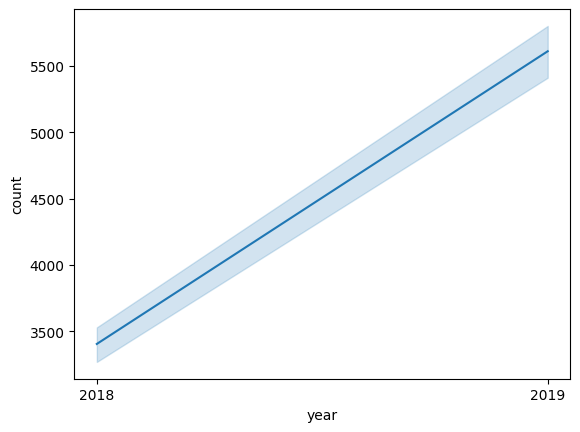

In [479]:
sns.lineplot(data =bikeSharing_cleaned, x='year',y='count')
plt.xticks(ticks=[2018, 2019], labels=['2018', '2019'])
plt.show()

#### 2.Temperature vs Bike share counts
#### Conclusion - The Below graph represents lowering Bike share counts with increase in temperature and low temperatures
####              Higher Bike share counts in range of Temperature between 20-25 degree celsius

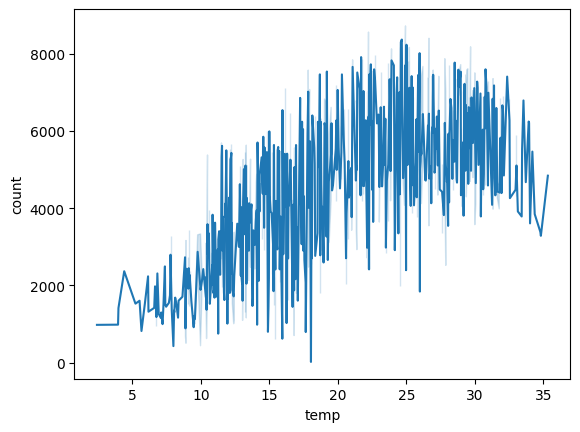

In [480]:
sns.lineplot(data =bikeSharing_cleaned, x='temp',y='count')

plt.show()

#### 3.Windspeed vs Bike share counts
#### Conclusion - The Below graph represents lowering Bike share counts with increase in windspeed
####              Higher Bike share counts in Temperature between 15-20 windspeed range

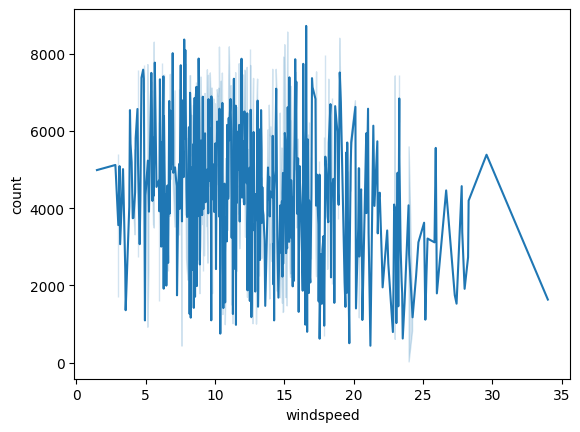

In [481]:
sns.lineplot(data =bikeSharing_cleaned, x='windspeed',y='count')

plt.show()

#### 4.Humidity vs Bike share counts
#### Conclusion - The Below graph represents lowering Bike share counts with increase in humidity and low humidity conditions
####              Higher Bike share counts in Humidity range between 40 - 60

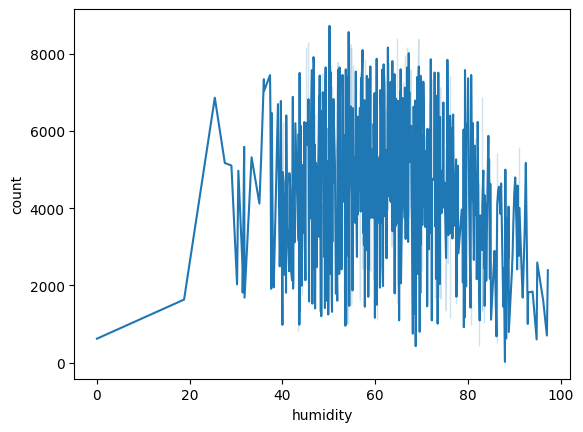

In [482]:
sns.lineplot(data =bikeSharing_cleaned, x='humidity',y='count')

plt.show()

#### 5.Bike share counts across variables - season , Year , month , weekday , workingday , weathersit and holiday
#### Conclusion - Fall season , Year 2019 , September month ,Saturday ,Clear Weather have recorded the highest number of bikeshare counts     

<Axes: xlabel='holiday', ylabel='count'>

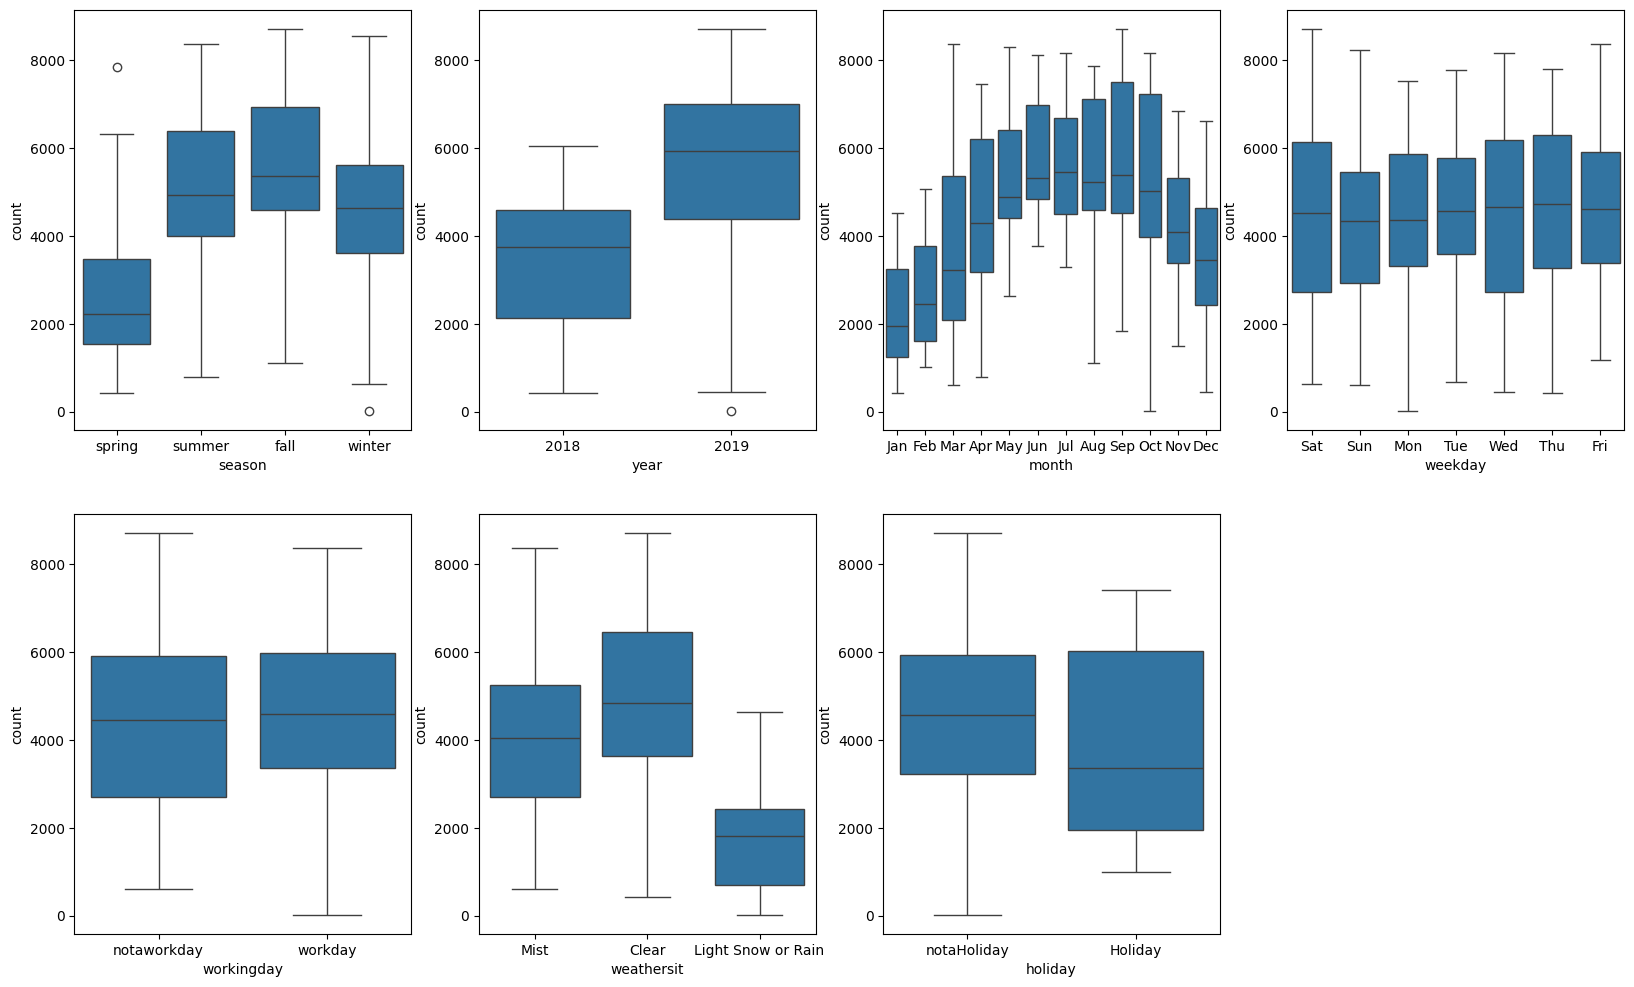

In [483]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='season',y='count',data= bikeSharing_cleaned)
plt.subplot(2,4,2)
sns.boxplot(x='year',y='count',data= bikeSharing_cleaned)
plt.subplot(2,4,3)
sns.boxplot(x='month',y='count',data= bikeSharing_cleaned)
plt.subplot(2,4,4)
sns.boxplot(x='weekday',y='count',data= bikeSharing_cleaned)
plt.subplot(2,4,5)
sns.boxplot(x='workingday',y='count',data= bikeSharing_cleaned)
plt.subplot(2,4,6)
sns.boxplot(x='weathersit',y='count',data= bikeSharing_cleaned)
plt.subplot(2,4,7)
sns.boxplot(x='holiday',y='count',data= bikeSharing_cleaned)

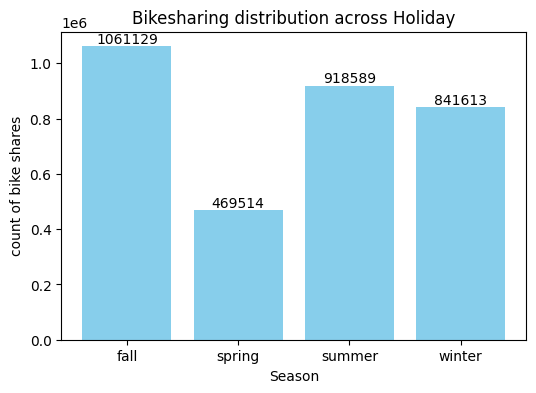

In [545]:
season_count= bikeSharing_cleaned.groupby('season')['count'].sum().reset_index()

plt.figure(figsize=(6,4))
bars= plt.bar(season_count['season'],season_count['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('Season')
plt.ylabel('count of bike shares')
plt.show()

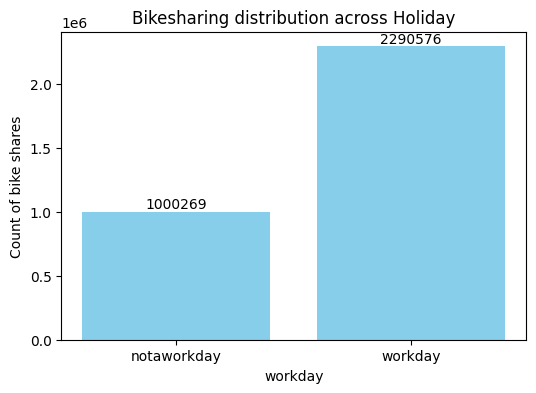

In [551]:
workingday_count= bikeSharing_cleaned.groupby('workingday')['count'].sum().reset_index()
plt.figure(figsize=(6,4))
bars= plt.bar(workingday_count['workingday'],workingday_count['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('workday')
plt.ylabel('Count of bike shares')
plt.show()

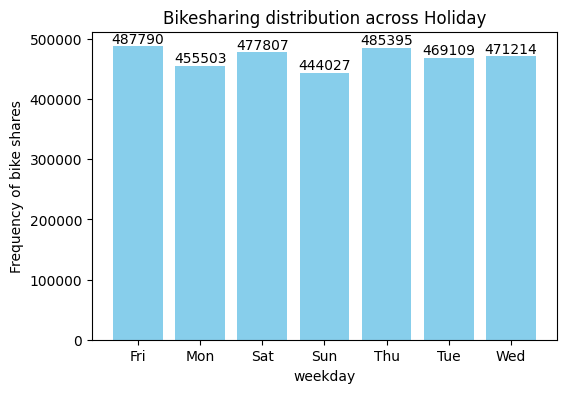

In [550]:
week_count= bikeSharing_cleaned.groupby('weekday')['count'].sum().reset_index()
plt.figure(figsize=(6,4))
bars= plt.bar(week_count['weekday'],week_count['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('weekday')
plt.ylabel('Frequency of bike shares')
plt.show()

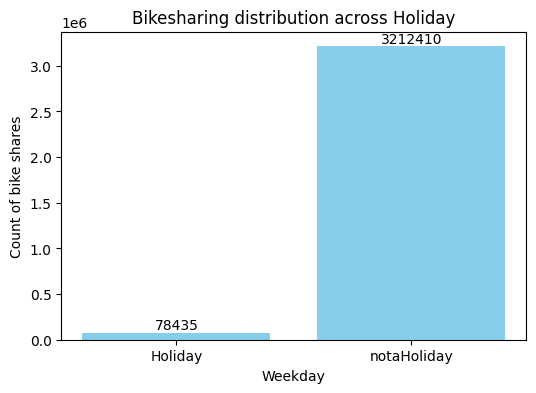

In [547]:
holiday_Count= bikeSharing_cleaned.groupby('holiday')['count'].sum().reset_index()
plt.figure(figsize=(6,4))
bars= plt.bar(holiday_Count['holiday'],holiday_Count['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('Weekday')
plt.ylabel('Count of bike shares')
plt.show()

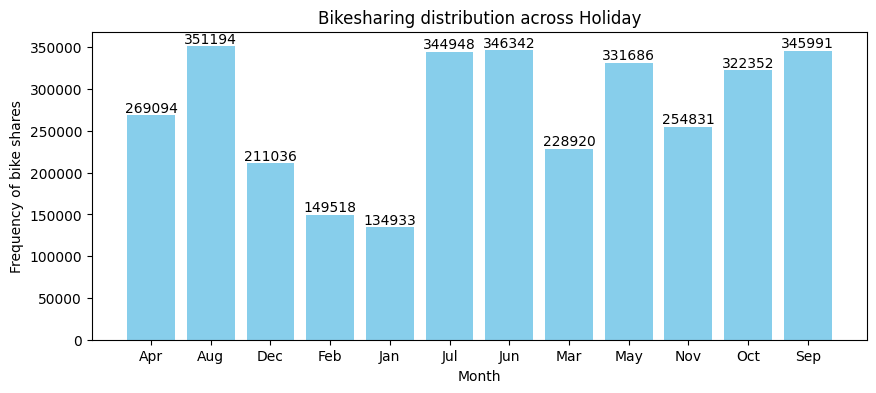

In [552]:
month_count= bikeSharing_cleaned.groupby('month')['count'].sum().reset_index()
plt.figure(figsize=(10,4))
bars= plt.bar(month_count['month'],month_count['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('Month')
plt.ylabel('Frequency of bike shares')
plt.show()

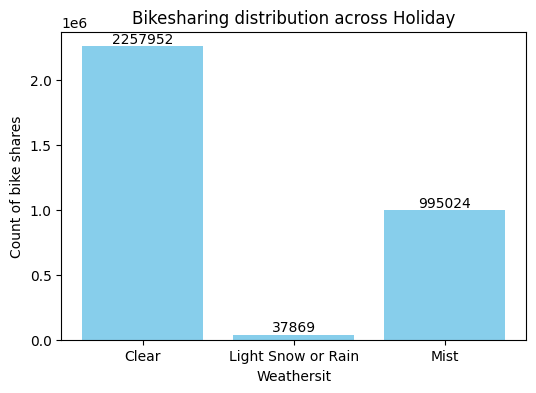

In [548]:
weathersit_Season= bikeSharing_cleaned.groupby('weathersit')['count'].sum().reset_index()
plt.figure(figsize=(6,4))
bars= plt.bar(weathersit_Season['weathersit'],weathersit_Season['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('Weathersit')
plt.ylabel('Count of bike shares')
plt.show()

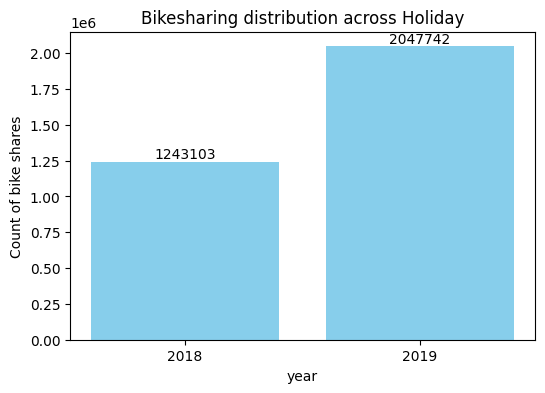

In [553]:
year_count= bikeSharing_cleaned.groupby('year')['count'].sum().reset_index()
plt.figure(figsize=(6,4))
bars= plt.bar(year_count['year'],year_count['count'], color='skyblue')
for bar in bars:
    yval =bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2 ,yval ,format(yval,'.0f'),ha='center',va='bottom',fontsize=10)
plt.title('Bikesharing distribution across Holiday')
plt.xlabel('year')
plt.xticks(ticks=[2018, 2019], labels=['2018', '2019'])
plt.ylabel('Count of bike shares')
plt.show()

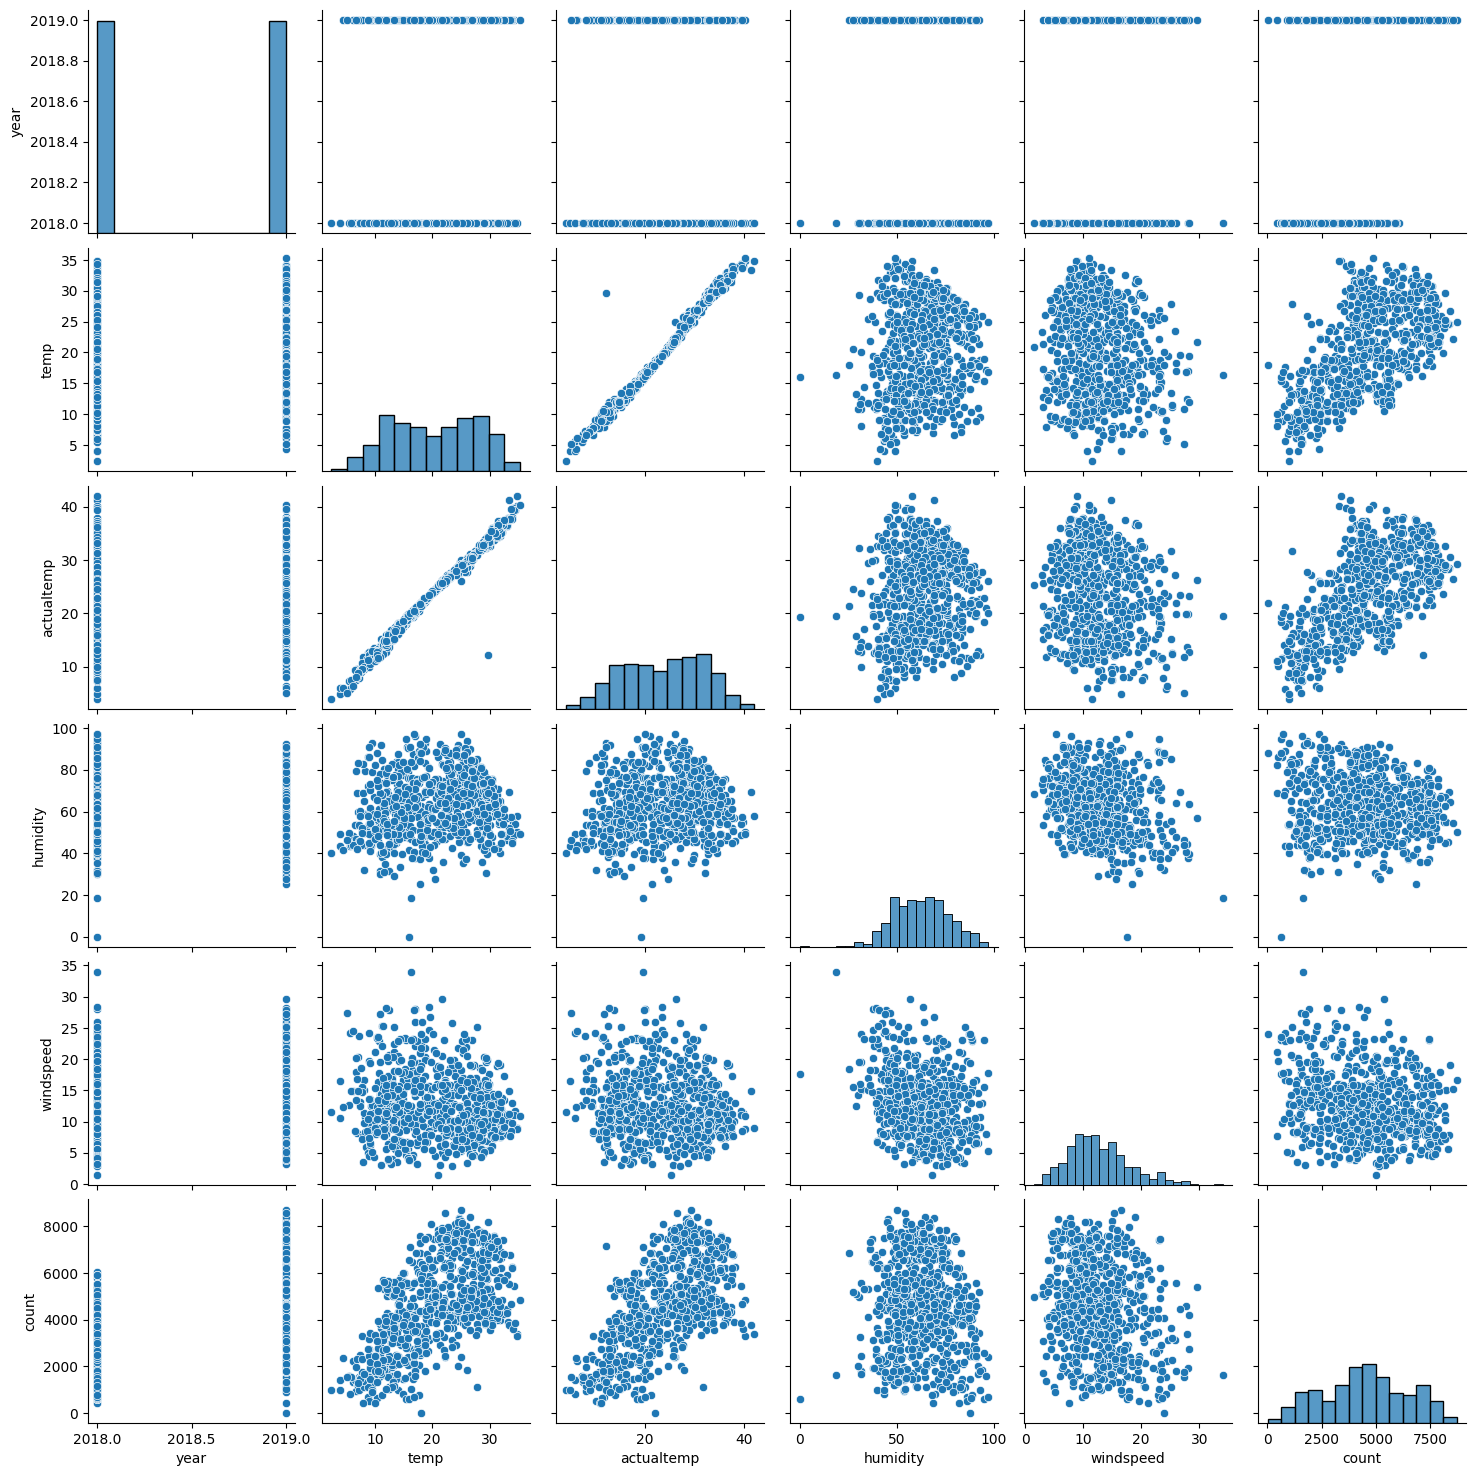

In [491]:
sns.pairplot(bikeSharing_cleaned)
plt.show()

## Creating Dummy Variables - drop_first and Conversion to int data type

In [492]:
df_months = pd.get_dummies(bikeSharing_cleaned['month'],drop_first=True)
df_months = df_months.astype(int)  
df_weekday = pd.get_dummies(bikeSharing_cleaned['weekday'],drop_first=True)
df_weekday = df_weekday.astype(int)
df_weathersit = pd.get_dummies(bikeSharing_cleaned['weathersit'],drop_first=True)
df_weathersit = df_weathersit.astype(int)
df_season = pd.get_dummies(bikeSharing_cleaned['season'],drop_first=True)
df_season = df_season.astype(int)
bikeSharing_updated = pd.concat([bikeSharing_cleaned,df_months,df_weekday,df_weathersit,df_season],axis=1)
bikeSharing_updated.drop(['season','month','weekday','weathersit'],axis=1,inplace=True)
bikeSharing_updated

,year,holiday,workingday,temp,actualtemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or Rain,Mist,spring,summer,winter
0,2018,notaHoliday,notaworkday,14.11,18.18,80.58,10.75,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2018,notaHoliday,notaworkday,14.90,17.69,69.61,16.65,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,2018,notaHoliday,workday,8.05,9.47,43.73,16.64,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,notaHoliday,workday,8.20,10.61,59.04,10.74,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,2018,notaHoliday,workday,9.31,11.46,43.70,12.52,1600,0,0,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2019,notaHoliday,workday,10.42,11.33,65.29,23.46,2114,0,1,...,0,0,1,0,0,0,1,1,0,0
726,2019,notaHoliday,workday,10.39,12.75,59.00,10.42,3095,0,1,...,0,0,0,0,0,0,1,1,0,0
727,2019,notaHoliday,notaworkday,10.39,12.12,75.29,8.33,1341,0,1,...,1,0,0,0,0,0,1,1,0,0
728,2019,notaHoliday,notaworkday,10.49,11.58,48.33,23.50,1796,0,1,...,0,1,0,0,0,0,0,1,0,0


In [493]:
bikeSharing_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                730 non-null    int64  
 1   holiday             730 non-null    object 
 2   workingday          730 non-null    object 
 3   temp                730 non-null    float64
 4   actualtemp          730 non-null    float64
 5   humidity            730 non-null    float64
 6   windspeed           730 non-null    float64
 7   count               730 non-null    int64  
 8   Aug                 730 non-null    int32  
 9   Dec                 730 non-null    int32  
 10  Feb                 730 non-null    int32  
 11  Jan                 730 non-null    int32  
 12  Jul                 730 non-null    int32  
 13  Jun                 730 non-null    int32  
 14  Mar                 730 non-null    int32  
 15  May                 730 non-null    int32  
 16  Nov     

In [494]:
holiday_dictionary = {
    'notaHoliday' : 0,
    'Holiday' : 1 ,
   }
bikeSharing_updated['holiday'] = bikeSharing_cleaned['holiday'].map(holiday_dictionary)
bikeSharing_updated['holiday'].unique()

array([0, 1], dtype=int64)

In [495]:
workingday_dictionary = {
    'notaworkday' : 0 ,
    'workday' : 1,
   }
bikeSharing_updated['workingday'] = bikeSharing_cleaned['workingday'].map(workingday_dictionary)
bikeSharing_updated['workingday'].unique()

array([0, 1], dtype=int64)

In [496]:
bikeSharing_updated.shape

(730, 30)

## Splitting the data for training and testing

In [497]:
bikeSharing_train,bikeSharing_test = train_test_split(bikeSharing_updated,train_size=0.7,random_state=100)

In [498]:
bikeSharing_train.shape

(510, 30)

In [499]:
bikeSharing_test.shape

(220, 30)

In [500]:
scaler = MinMaxScaler()

In [501]:
columndatatype = [] 
for col in bikeSharing_updated.columns:
    unique_values =bikeSharing_updated[col].unique()
    data_type =bikeSharing_updated[col].dtype
    columndatatype.append ([col, unique_values, data_type])
columndatatype_df =pd.DataFrame(columndatatype, columns = ['col','unique_values','data_type'])
columndatatype_df

,col,unique_values,data_type
0,year,"[2018, 2019]",int64
1,holiday,"[0, 1]",int64
2,workingday,"[0, 1]",int64
3,temp,"[14.11, 14.9, 8.05, 8.2, 9.31, 8.38, 8.06, 6.7...",float64
4,actualtemp,"[18.18, 17.69, 9.47, 10.61, 11.46, 11.66, 10.4...",float64
5,humidity,"[80.58, 69.61, 43.73, 59.04, 43.7, 51.83, 49.8...",float64
6,windspeed,"[10.75, 16.65, 16.64, 10.74, 12.52, 6.0, 11.3,...",float64
7,count,"[985, 801, 1349, 1562, 1600, 1606, 1510, 959, ...",int64
8,Aug,"[0, 1]",int32
9,Dec,"[0, 1]",int32


In [502]:
num_vars = ['temp','actualtemp','humidity','windspeed','count']
bikeSharing_train[num_vars]= scaler.fit_transform(bikeSharing_train[num_vars])

In [503]:
bikeSharing_train.head()

,year,holiday,workingday,temp,actualtemp,humidity,windspeed,count,Aug,Dec,...,Sat,Sun,Thu,Tue,Wed,Light Snow or Rain,Mist,spring,summer,winter
576,2019,0,1,0.815254,0.766343,0.725680,0.264678,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,0.442419,0.438960,0.640148,0.255374,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,2019,0,0,0.245214,0.200315,0.498042,0.663138,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,2019,0,0,0.395624,0.391966,0.504534,0.188643,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,2018,0,1,0.345792,0.318981,0.751855,0.381136,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


#### Temperature Variable has the highest corr score against Bike share counts of 0.65 as indicated below

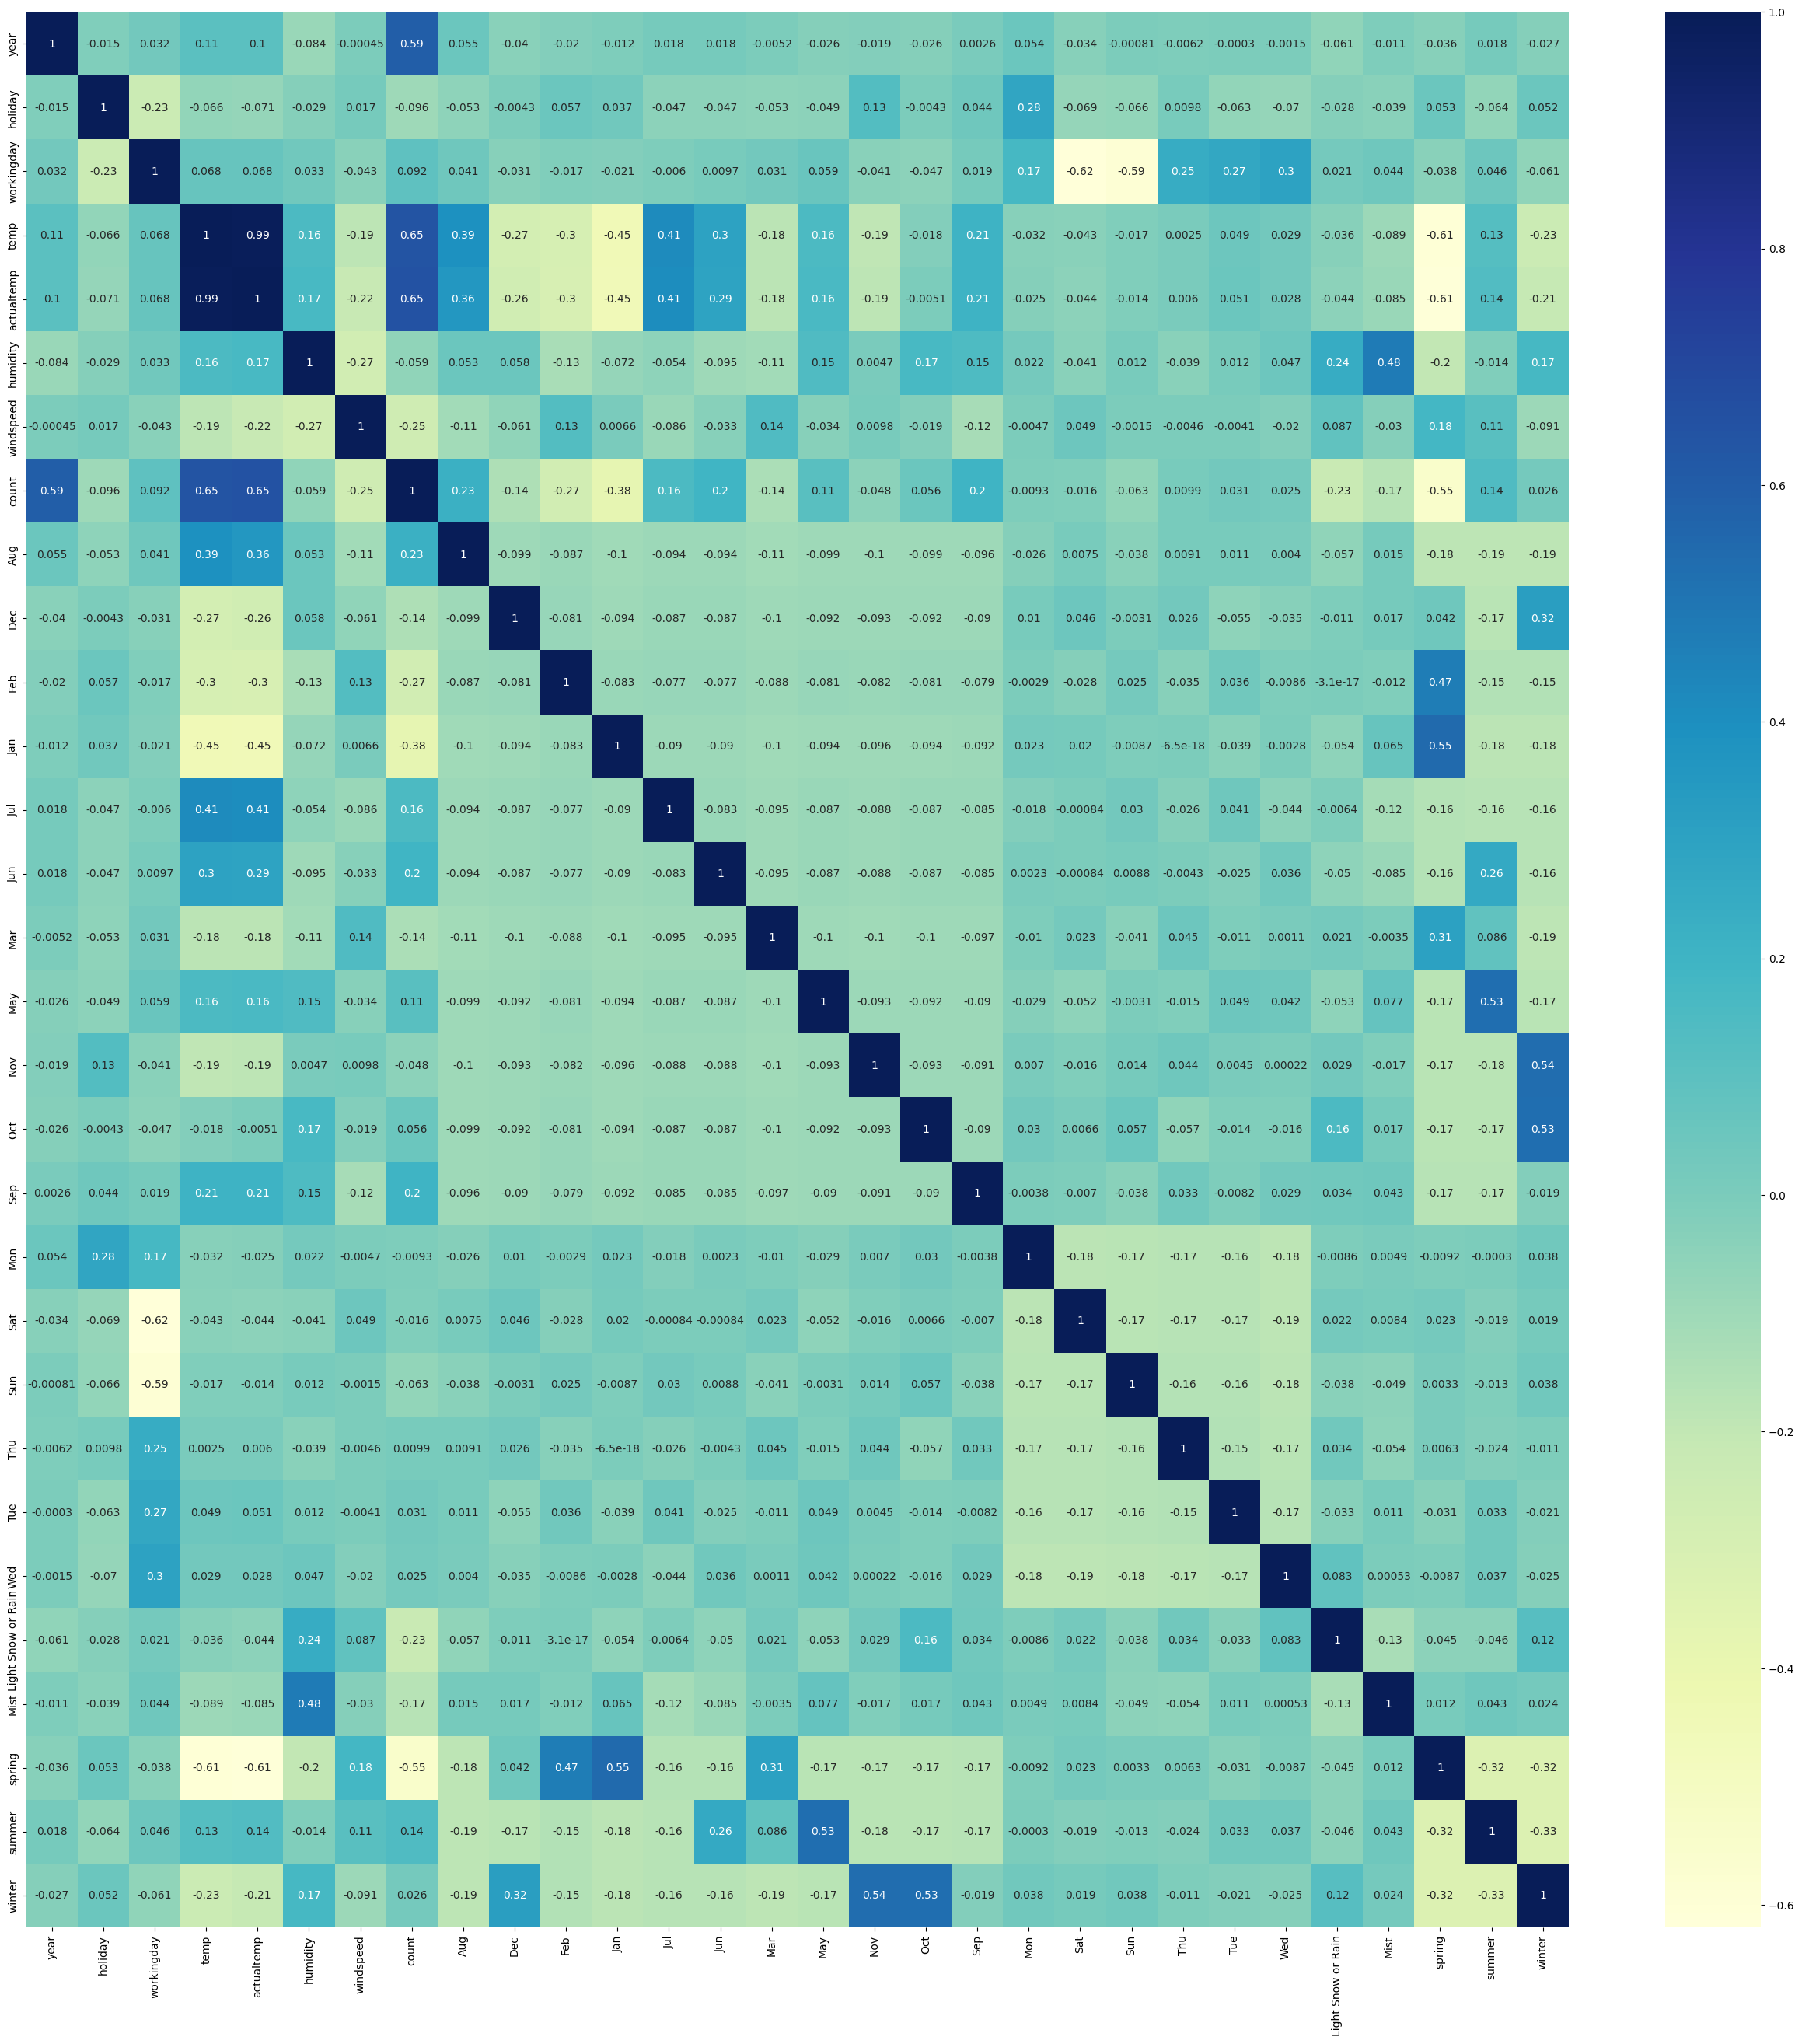

In [504]:
plt.figure(figsize=(32,32))
sns.heatmap(bikeSharing_train.corr(),cmap="YlGnBu",annot = True)
plt.show()

In [505]:
y_train = bikeSharing_train.pop('count')
X_train = bikeSharing_train

In [506]:
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train,y_train)

In [507]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('actualtemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light Snow or Rain', True, 1),
 ('Mist', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [508]:
col =X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jan',
       'Jul', 'Sep', 'Sat', 'Light Snow or Rain', 'Mist', 'spring', 'summer',
       'winter'],
      dtype='object')

In [509]:
X_train.columns[~rfe.support_]

Index(['actualtemp', 'Aug', 'Dec', 'Feb', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Mon', 'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [510]:
X_train_rfe = X_train[col]

In [511]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [512]:
lm = sm.OLS(y_train,X_train_rfe).fit()

## Train model Result summary

In [513]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          4.29e-191
Time:                        20:08:50   Log-Likelihood:                 519.63
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -464.9388     16

## Rebuilding Train Model dropping Jan column

In [514]:
X_train_new = X_train_rfe.drop(['Jan'],axis = 1)

In [515]:
X_train_rfe = sm.add_constant(X_train_new)

In [516]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [517]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.14e-191
Time:                        20:08:50   Log-Likelihood:                 517.59
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -463.4086     16

In [542]:
X_train_new = X_train_new.drop(['const'],axis =1)
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,year,57.62
2,temp,22.33
9,spring,6.53
1,workingday,5.09
3,windspeed,5.01
11,winter,4.44
10,summer,3.45
6,Sat,1.93
4,Jul,1.60
8,Mist,1.60


In [524]:
X_train_new = X_train_rfe.drop(['humidity'],axis = 1)

In [525]:
X_train_rfe = sm.add_constant(X_train_new)

In [526]:
lm = sm.OLS(y_train,X_train_rfe).fit()

## Rebuilding Train model after dropping Humidity column

In [527]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.31e-188
Time:                        20:10:15   Log-Likelihood:                 508.19
No. Observations:                 510   AIC:                            -988.4
Df Residuals:                     496   BIC:                            -929.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -471.4923     16

In [529]:
X_train_new = X_train_rfe.drop(['holiday'],axis = 1)

In [530]:
X_train_rfe = sm.add_constant(X_train_new)

In [531]:
lm = sm.OLS(y_train,X_train_rfe).fit()

In [532]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          7.24e-189
Time:                        20:15:32   Log-Likelihood:                 506.00
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -930.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -471.8514     16

In [534]:
y_train_count = lm.predict(X_train_rfe)

C:\Users\grkk\AppData\Local\Temp\ipykernel_17164\1799695284.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_count), bins = 20)


Text(0.5, 0, 'Errors')

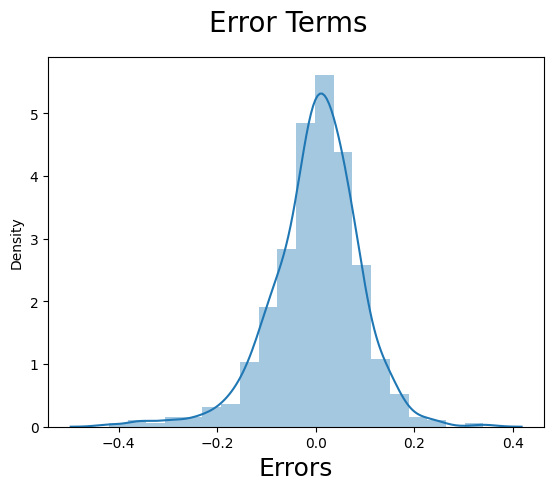

In [535]:
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)      

In [536]:
num_vars = ['temp','actualtemp','humidity','windspeed','count']
bikeSharing_test[num_vars]= scaler.transform(bikeSharing_test[num_vars])

In [537]:
y_test = bikeSharing_test.pop('count')
X_test = bikeSharing_test

In [538]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [539]:
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

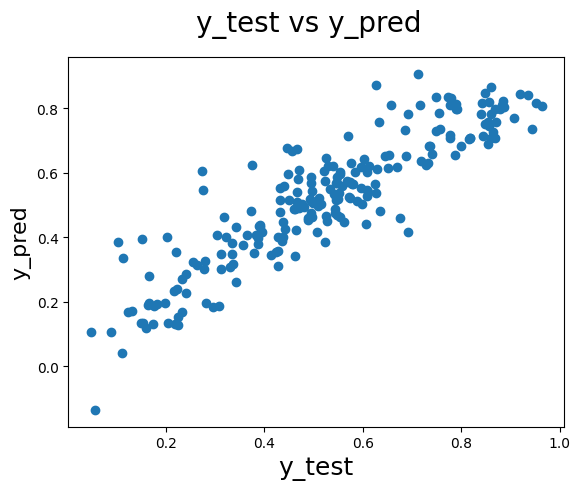

In [540]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

## Comparison between Train vs Test - R2 score 

In [544]:
r2_train = r2_score(y_train,y_train_count)
r2_test = r2_score(y_test,y_pred)
print(f"{r2_train} and {r2_test}")

0.8398665229631721 and 0.808300288402878
